Prepare dataset

In [187]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/UCI_Credit_Card.csv")

df["y"] = df["default.payment.next.month"]
df.drop("default.payment.next.month", axis=1, inplace=True)
df.drop("ID", axis=1, inplace=True)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Calculate imbalance in dataset

In [188]:
df["y"].value_counts()[0] / len(df["y"])

0.7788

Split data into test and validation sets

In [189]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X, y = df.drop("y", axis=1), df["y"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

GBT Algorithm

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbt = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, criterion="friedman_mse", n_estimators=100, n_iter_no_change=5, tol=0.001, random_state=0)

model_gbt.fit(X_train, y_train)
y_pred = model_gbt.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.68      0.35      0.46      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



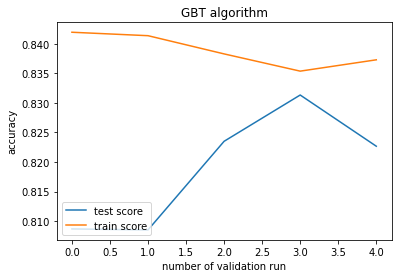

In [191]:
from sklearn.model_selection import cross_validate
import matplotlib.pylab as plt

cv = cross_validate(model_gbt, X, y, return_train_score=True, cv=5)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.ylabel("accuracy")
plt.title("GBT algorithm")
plt.show()

AdaBoost

In [192]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7060
           1       0.69      0.31      0.43      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



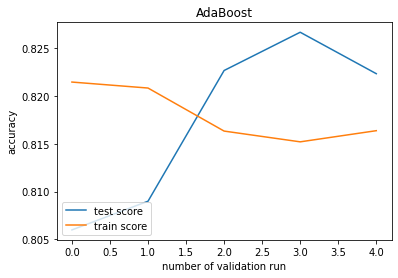

In [193]:
cv = cross_validate(model_ada, X, y, return_train_score=True, cv=5)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.ylabel("accuracy")
plt.title("AdaBoost")
plt.show()

XGBoost

In [194]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.36      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



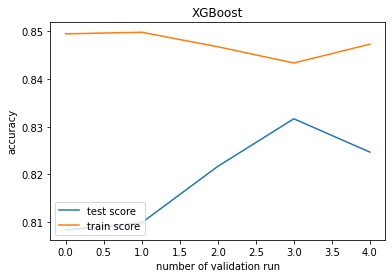

In [195]:
cv = cross_validate(model_xgb, X, y, return_train_score=True, cv=5)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.ylabel("accuracy")
plt.title("XGBoost")
plt.show()